# MMDetection with RTMDet

- baseline

![baseline: RTMDet-tiny](https://user-images.githubusercontent.com/66227028/242804089-6b7d3608-6afc-4d95-a45f-483b6afbfb06.png)


In [1]:
!mim list | grep mm

mmagic          1.0.1      https://github.com/open-mmlab/mmagic
mmcv            2.0.0rc4   https://github.com/open-mmlab/mmcv
mmdet           3.0.0      /home/louzekun/miniconda3/envs/mmlab2/lib/python3.9/site-packages
mmengine        0.7.3      https://github.com/open-mmlab/mmengine
mmpose          1.0.0      https://github.com/open-mmlab/mmpose
mmpretrain      1.0.0rc8   https://github.com/open-mmlab/mmpretrain
mmsegmentation  1.0.0      https://github.com/open-mmlab/mmsegmentation


In [2]:
PROJECT_ROOT = '/home/louzekun/projects/mmlab/mmpose'

import os
os.chdir(PROJECT_ROOT)
os.getcwd()

'/mnt/data/ai4phys/louzekun/projects/mmlab/mmpose'

In [3]:
!pwd

/mnt/data/ai4phys/louzekun/projects/mmlab/mmpose


## 训练

- 进行的调整:
```python
data_root = '~/dataset/Ear210_Keypoint_Dataset_coco/'
TRAIN_BATCH_SIZE = 16  # 8
VAL_BATCH_SIZE = 8  # 4
TEST_BATCH_SIZE = 8  # null
num_workers=[stage]_BATCH_SIZE//2  # for each dataloader
```

- 原来配置文件的问题:
```python
line 100: train_dataloader  # batch_size=8, should be TRAIN_BATCH_SIZE
line 146: val_dataloader  # batch_size=4, should be VAL_BATCH_SIZE
# so do the test_dataloader
```

In [4]:
# !python /home/louzekun/projects/mmlab/src_code/mmdetection/tools/train.py \
#     ./hw/rtmdet_tiny_ear.py \
#     --work-dir ./hw/MMDet_RTMDet/
!cat /home/louzekun/projects/mmlab/mmpose/hw/MMDet_RTMDet/20230604_162124/20230604_162124.log | tail -n 16

2023/06/04 21:06:05 - mmengine - INFO - Epoch(train) [200][ 7/11]  lr: 3.0656e-03  eta: 0:00:29  time: 3.5888  data_time: 3.1987  memory: 5088  loss: 0.2844  loss_cls: 0.0726  loss_bbox: 0.2118
2023/06/04 21:06:05 - mmengine - INFO - Epoch(train) [200][ 8/11]  lr: 3.0625e-03  eta: 0:00:22  time: 3.5789  data_time: 3.1897  memory: 5088  loss: 0.2833  loss_cls: 0.0722  loss_bbox: 0.2111
2023/06/04 21:06:05 - mmengine - INFO - Epoch(train) [200][ 9/11]  lr: 3.0594e-03  eta: 0:00:14  time: 3.5794  data_time: 3.1897  memory: 5088  loss: 0.2838  loss_cls: 0.0727  loss_bbox: 0.2111
2023/06/04 21:06:06 - mmengine - INFO - Epoch(train) [200][10/11]  lr: 3.0563e-03  eta: 0:00:07  time: 3.5796  data_time: 3.1896  memory: 5088  loss: 0.2850  loss_cls: 0.0733  loss_bbox: 0.2117
2023/06/04 21:06:06 - mmengine - INFO - Exp name: rtmdet_tiny_ear_20230604_162124
2023/06/04 21:06:06 - mmengine - INFO - Epoch(train) [200][11/11]  lr: 3.0531e-03  eta: 0:00:00  time: 3.5784  data_time: 3.1896  memory: 2585

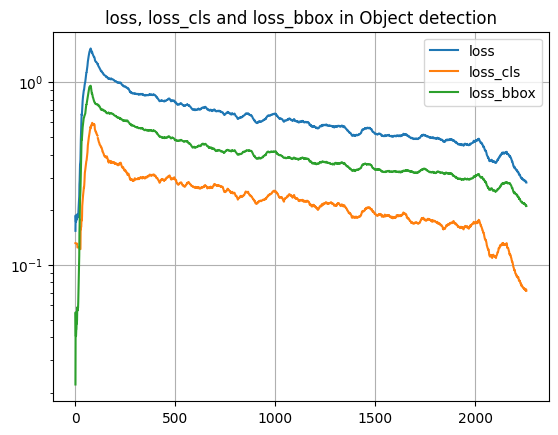

In [5]:
import matplotlib.pyplot as plt
import json
# write a similar code as above
# json is {"lr": 4.043963963963964e-06, "data_time": 26.801936507225037, "loss": 0.18611308187246323, "loss_cls": 0.13114985078573227, "loss_bbox": 0.054963234812021255, "time": 28.41678285598755, "epoch": 1, "memory": 5088, "step": 2}
log_scalars = '/home/louzekun/projects/mmlab/mmpose/hw/MMDet_RTMDet/20230604_162124/vis_data/scalars.json'
with open(log_scalars) as f:
    lines = f.readlines()
    scalars = [json.loads(line) for line in lines]
loss = [entry.get('loss') for entry in scalars]
loss_cls = [entry.get('loss_cls') for entry in scalars]
loss_bbox = [entry.get('loss_bbox') for entry in scalars]
plt.plot(loss, label='loss')
plt.plot(loss_cls, label='loss_cls')
plt.plot(loss_bbox, label='loss_bbox')
plt.title('loss, loss_cls and loss_bbox in Object detection')
plt.grid()
plt.legend()
plt.yscale('log')
plt.show()

# 测试

In [7]:
# !python /home/louzekun/projects/mmlab/src_code/mmdetection/tools/test.py \
#     ./hw/rtmdet_tiny_ear.py \
#     ./hw/MMDet_RTMDet/best_coco_bbox_mAP_epoch_175.pth \
#     --work-dir ./hw/MMDet_RTMDet/
!cat /home/louzekun/projects/mmlab/mmpose/hw/MMDet_RTMDet/20230604_221230/20230604_221230.log | tail -n 16

(NORMAL      ) IterTimerHook                      
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_run:
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
2023/06/04 22:12:38 - mmengine - INFO - Load checkpoint from ./hw/MMDet_RTMDet/best_coco_bbox_mAP_epoch_175.pth
2023/06/04 22:12:58 - mmengine - INFO - Epoch(test) [1/6]    eta: 0:01:41  time: 20.3855  data_time: 17.9279  memory: 341  
2023/06/04 22:12:59 - mmengine - INFO - Epoch(test) [2/6]    eta: 0:00:41  time: 10.3406  data_time: 8.9654  memory: 341  
2023/06/04 22:12:59 - mmengine - INFO - Epoch(test) [3/6]    eta: 0:00:20  time: 6.9592  data_time: 5.9777  memory: 341  
2023/06/04 22:12:59 - mmengine - INFO - Epoch(test) [4/6]    eta: 0:00:10  time: 5.2961  data_time: 4.5066  memory: 341  
2023/06/04 22:13:00 - mmengine - INFO - Epoch(test) [5/6]    eta: 0:00:04  time: 4.2951  data_time: 3.6059  memory: 341  
2023/06/04 22:13:00 - mmengine - INFO - Epoch(test) [6/6]    eta:

- copied from cmdlines
```text
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.821
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.964
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.964
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.821
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.857
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.857
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.857
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.857
06/04 22:13:00 - mmengine - INFO - bbox_mAP_copypaste: 0.821 0.964 0.964 -1.000 -1.000 0.821
06/04 22:13:00 - mmengine - INFO - Epoch(test) [6/6]    coco/bbox_mAP: 0.8210  coco/bbox_mAP_50: 0.9640  coco/bbox_mAP_75: 0.9640  coco/bbox_mAP_s: -1.0000  coco/bbox_mAP_m: -1.0000  coco/bbox_mAP_l: 0.8210  data_time: 3.0053  time: 3.6121
```

# 预测
- 只预测单张图片了, 视频没搞

In [8]:
!python /home/louzekun/projects/mmlab/src_code/mmdetection/demo/image_demo.py \
        ./hw/mydata/right_ear_lr_inv.jpg \
        ./hw/rtmdet_tiny_ear.py \
        --weights ./hw/MMDet_RTMDet/best_coco_bbox_mAP_epoch_175.pth \
        --out-dir ./hw/MMDet_RTMDet/outputs/ \
        --pred-score-thr 0.5

Loads checkpoint by local backend from path: ./hw/MMDet_RTMDet/best_coco_bbox_mAP_epoch_175.pth
06/04 22:26:34 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/04 22:26:34 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/louzekun/miniconda3/envs/mmlab2/lib/python3.9/site-packages/torch/function━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
al.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be 
required to pass the indexing argument. (Triggered internally at  
/opt/conda/conda-bld/pytorch_1659484809662/work/aten/src/ATen/native/TensorShape
.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Inference ━━━━━

img_size=(3024, 4032), img_size_resize=(302, 403)


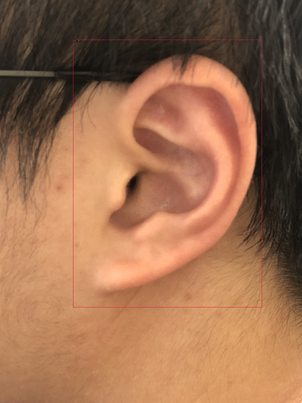

In [8]:
from PIL import Image
# load image
img_path = './hw/MMDet_RTMDet/outputs/vis/right_ear_lr_inv.jpg'
# img_path = './hw/MMDet_RTMDet/outputs/vis/right_ear.jpg'
img = Image.open(img_path)
img_size = img.size
img_size_resize = tuple([i//10 for i in img_size])
print(f"{img_size=}, {img_size_resize=}")
img_resized = img.resize(img_size_resize, Image.LANCZOS)
img_resized